# 车牌提取



In [1]:
import cv2
from matplotlib import pyplot as plt

def plt_showRGB(img):
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

# plt显示灰度图片
def plt_showGray(img):
    plt.imshow(img,cmap='gray')
    plt.show()

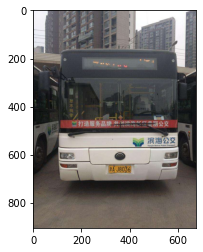

In [2]:
img = cv2.imread("./image/test4.png")
plt_showRGB(img)

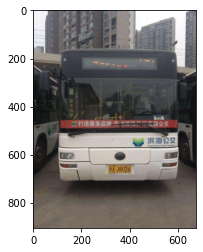

In [3]:
# 用高斯滤波器去噪
image = cv2.GaussianBlur(img, (3, 3), 0)
plt_showRGB(image)

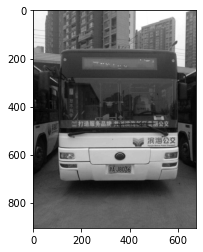

In [4]:
# 灰度处理
imgGray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_showGray(imgGray)

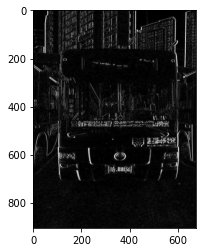

In [5]:
# sobel算子边缘检测
Sobel_x = cv2.Sobel(imgGray, cv2.CV_16S, 1, 0)
absX = cv2.convertScaleAbs(Sobel_x)  # 转回uint8
image = absX
plt_showGray(image)

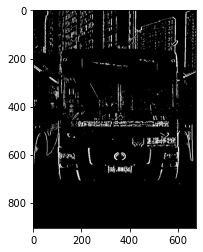

In [6]:
# 自适应阈值处理
ret, image = cv2.threshold(image, 127, 255, cv2.THRESH_OTSU)
plt_showGray(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


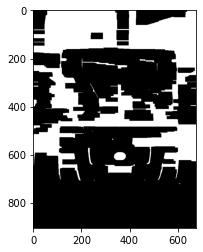

In [7]:
# 闭运算:先膨胀，后腐蚀 （可用于去除黑点）
# 创建一个核，尺寸为（17,5）
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 5))
print(kernel)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel,iterations = 3)
plt_showGray(image)

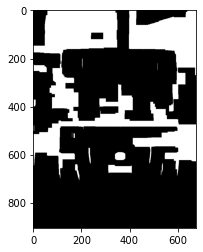

In [8]:
# 开运算：先腐蚀，后膨胀 （可去除小白点）
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))

# 用两个核分别做 一次闭运算 和 一次开运算
image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel1)
image = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel2)


plt_showGray(image)

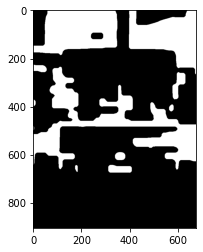

In [9]:
# 中值滤波去除噪点
image = cv2.medianBlur(image, 15)
plt_showGray(image)

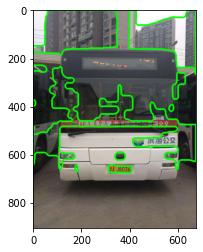

边缘个数： 11


In [10]:
# cv2.findContours 轮廓检测
# 获取轮廓
contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
image1 = img.copy()
cv2.drawContours(image1, contours, -1, (0, 255, 0), 5)
plt_showRGB(image1)
print('边缘个数：',len(contours))

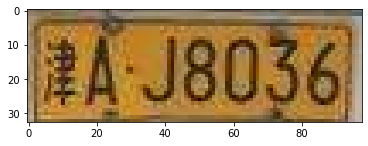

In [12]:
for item in contours:
    # cv2.boundingRect用一个最小的矩形，把找到的形状包起来
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    width = rect[2]
    height = rect[3]
    # 440mm×140mm
    if (width > (height * 2.5)) and (width < (height * 4)):
        image = img[y:y + height, x:x + width]
        # 图像保存
        plt_showRGB(image)
        cv2.imwrite('./plate.png', image)